## **TER**

In [275]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
import re
from IPython.display import display, HTML

# chemin en modifer
chemin = "/Users/thomassinapi/Desktop/M1 Data Science/TER/dataprojectstage_masterUPS.xlsx"

df = pd.read_excel(chemin)

---
## ***Visualisation des données***
---

In [276]:
df.head()

,ID,Job tenure,Age,Car price,Funding amount,Down payment,Loan duration,Monthly payment,Credit event,Married,Homeowner,"Default (y, target variable)"
0,1,34,55,4875,3087,0,36,0.047895,0,1,1,0
1,2,5,29,13000,13000,0,60,0.091667,0,0,0,1
2,3,14,38,17190,14190,0,60,0.088235,0,0,0,0
3,4,16,37,22773,23568,0,48,0.110084,0,1,1,0
4,5,1,61,7700,8526,0,48,0.123404,0,1,0,1


In [277]:
df.columns

Index(['ID', 'Job tenure', 'Age', 'Car price', 'Funding amount',
       'Down payment', 'Loan duration', 'Monthly payment', 'Credit event',
       'Married', 'Homeowner', 'Default (y, target variable)'],
      dtype='object')

In [278]:
df.describe()

,ID,Job tenure,Age,Car price,Funding amount,Down payment,Loan duration,Monthly payment,Credit event,Married,Homeowner,"Default (y, target variable)"
count,7440.000000,7440.000000,7440.000000,7440.000000,7440.000000,7440.000000,7440.000000,7440.000000,7440.000000,7440.000000,7440.000000,7440.000000
mean,3720.500000,9.329839,45.169086,12935.380780,11460.958065,0.089651,56.217608,0.105132,0.022043,0.534677,0.384812,0.200000
std,2147.887334,9.978688,14.796470,6204.246855,6018.551851,0.285700,19.383323,0.061108,0.146833,0.498830,0.486584,0.400027
min,1.000000,0.000000,18.000000,546.000000,546.000000,0.000000,6.000000,0.005128,0.000000,0.000000,0.000000,0.000000
25%,1860.750000,2.000000,33.000000,8149.250000,6845.750000,0.000000,48.000000,0.069020,0.000000,0.000000,0.000000,0.000000
50%,3720.500000,5.000000,46.000000,11950.000000,10382.500000,0.000000,60.000000,0.094662,0.000000,1.000000,0.000000,0.000000
75%,5580.250000,15.000000,55.000000,16500.000000,15000.000000,0.000000,72.000000,0.130379,0.000000,1.000000,1.000000,0.000000
max,7440.000000,58.000000,89.000000,47051.000000,30000.000000,1.000000,96.000000,2.630000,1.000000,1.000000,1.000000,1.000000


In [279]:
df.dtypes


ID                                int64
Job tenure                        int64
Age                               int64
Car price                         int64
Funding amount                    int64
Down payment                      int64
Loan duration                     int64
Monthly payment                 float64
Credit event                      int64
Married                           int64
Homeowner                         int64
Default (y, target variable)      int64
dtype: object

In [326]:
corr

,ID,Job tenure,Age,Car price,Funding amount,Down payment,Loan duration,Monthly payment,Credit event,Married,Homeowner,"Default (y, target variable)"
ID,1.000000,-0.005736,0.009000,-0.016266,-0.012565,-0.000320,-0.014815,-0.019365,-0.006868,0.021897,0.012497,-0.006914
Job tenure,-0.005736,1.000000,0.425832,0.000199,-0.080580,0.064221,-0.094292,-0.160660,0.008616,0.221500,0.257440,-0.180296
Age,0.009000,0.425832,1.000000,-0.079073,-0.160912,0.090476,-0.132321,-0.079696,-0.004191,0.309496,0.314084,-0.161035
Car price,-0.016266,0.000199,-0.079073,1.000000,0.843084,0.075427,0.289972,0.267442,-0.038734,0.081592,0.051907,0.028913
Funding amount,-0.012565,-0.080580,-0.160912,0.843084,1.000000,-0.244758,0.477581,0.317442,-0.000238,0.030685,-0.024082,0.164444
Down payment,-0.000320,0.064221,0.090476,0.075427,-0.244758,1.000000,-0.270832,-0.057777,-0.031092,0.026760,0.046735,-0.106330
Loan duration,-0.014815,-0.094292,-0.132321,0.289972,0.477581,-0.270832,1.000000,-0.039624,0.003463,-0.028301,-0.057581,0.160854
Monthly payment,-0.019365,-0.160660,-0.079696,0.267442,0.317442,-0.057777,-0.039624,1.000000,-0.007417,-0.089002,-0.091298,0.115224
Credit event,-0.006868,0.008616,-0.004191,-0.038734,-0.000238,-0.031092,0.003463,-0.007417,1.000000,-0.014108,-0.013376,0.124043
Married,0.021897,0.221500,0.309496,0.081592,0.030685,0.026760,-0.028301,-0.089002,-0.014108,1.000000,0.332972,-0.166799


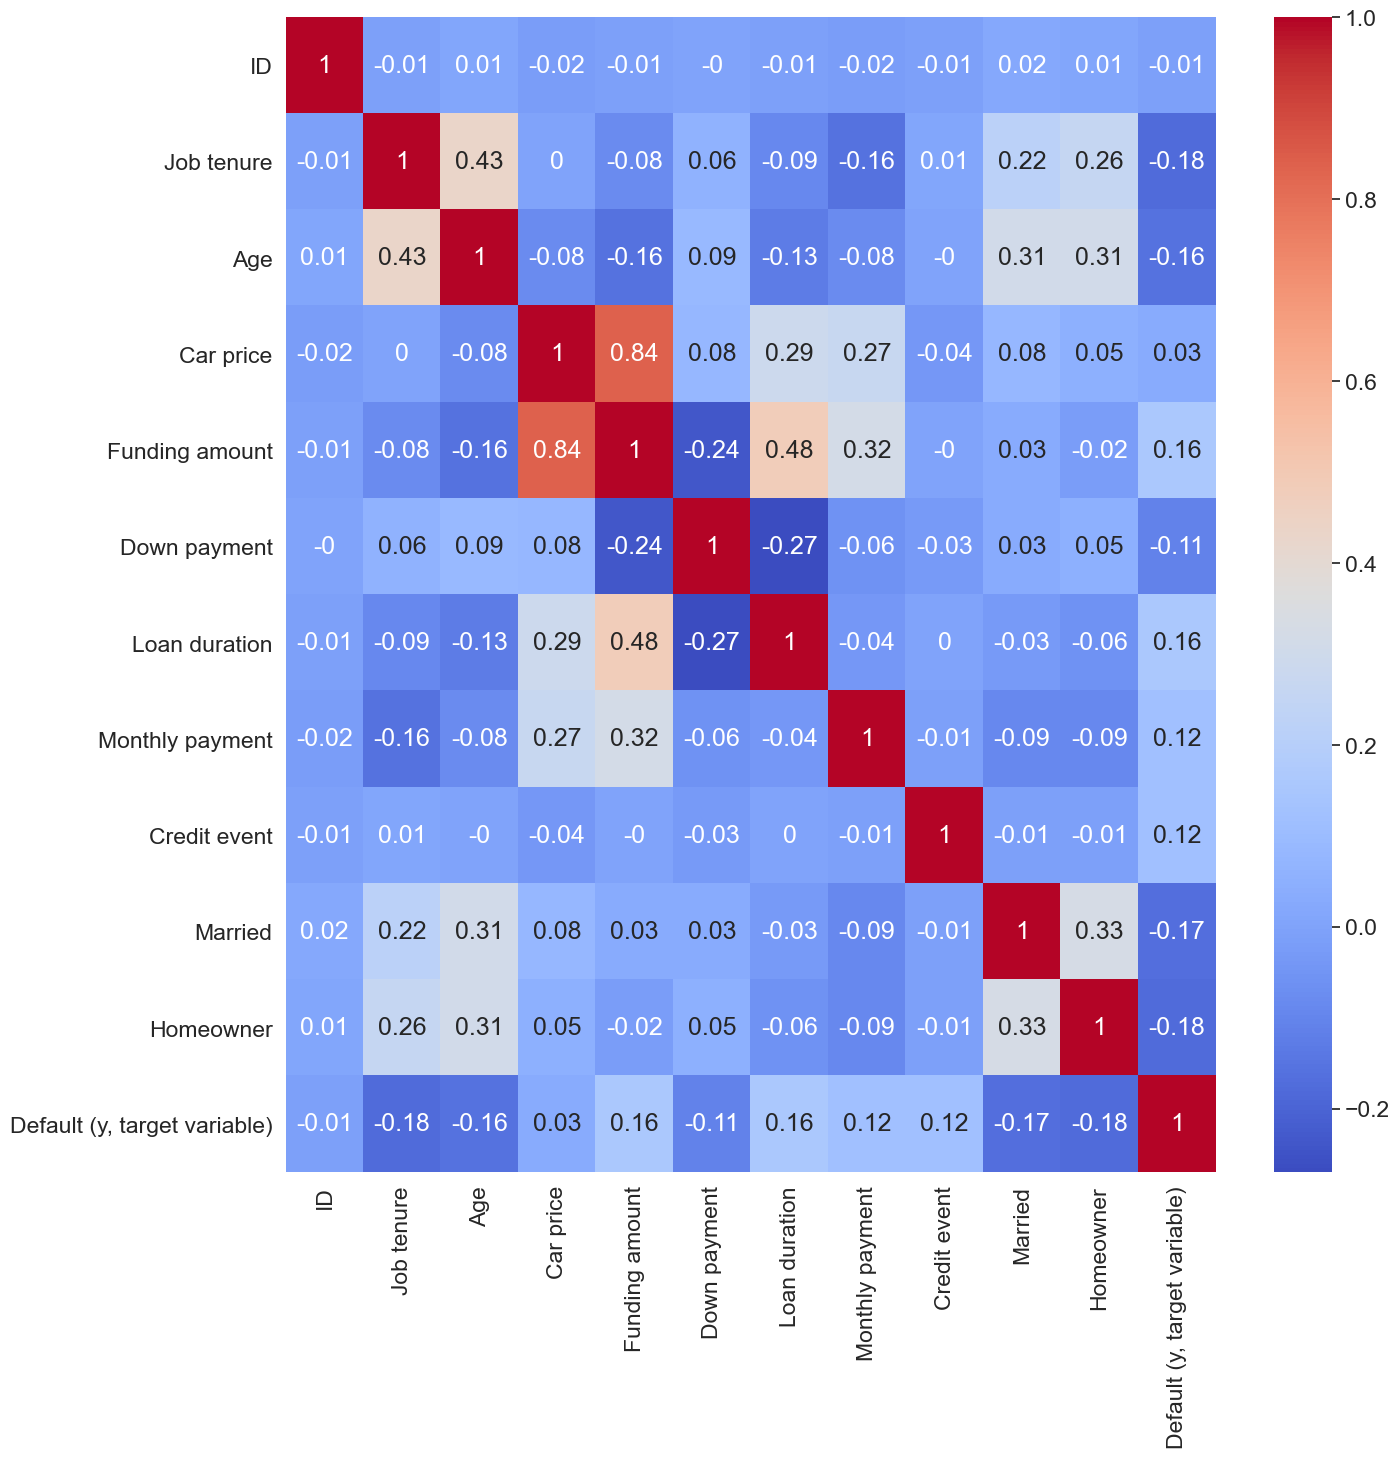

In [280]:
#matrice de corrélation
corr = df.corr()

# Heatmap arrondie à 1 décimales
plt.figure(figsize=(15,15))
sns.heatmap(corr.round(2), annot=True, cmap='coolwarm')
plt.show()


In [281]:
print(f"Nb missing values: {df.isnull().sum().sum()}")

Nb missing values: 0


In [282]:
from collections import Counter
counter = Counter(df["Default (y, target variable)"])
counter
# 1 n'a pas remboursé et 0 a remboursé


Counter({0: 5952, 1: 1488})

In [283]:
# transforme les variables ages en catégories (18-23, 24-30, 31-40, 41-50, 51-60, 61-70, 71-90)
df['Age'] = pd.cut(df['Age'], bins=[0, 23, 30, 40, 50, 60, 70, 100], labels=['0-23', '24-30', '31-40', '41-50', '51-60', '61-70', '71-100'])
df['Age'].value_counts()

Age
51-60     1760
41-50     1711
31-40     1332
24-30      967
61-70      738
0-23       570
71-100     362
Name: count, dtype: int64

In [284]:
# transforme les variables job tenure en catégories (0-2, 3-5, 6-10, 11-20, 21-30, 31-40, 41-50, 51-80)
df['Job tenure'] = pd.cut(df['Job tenure'], bins=[-1, 1, 2, 5, 10, 20, 30, 40, 50, 82], labels=['0-1', '1-2', '3-5', '6-10', '11-20', '21-30', '31-40', '41-50', '51-82'])
df['Job tenure'].value_counts()

Job tenure
0-1      1786
11-20    1350
3-5      1313
6-10     1224
21-30     771
1-2       646
31-40     291
41-50      55
51-82       4
Name: count, dtype: int64

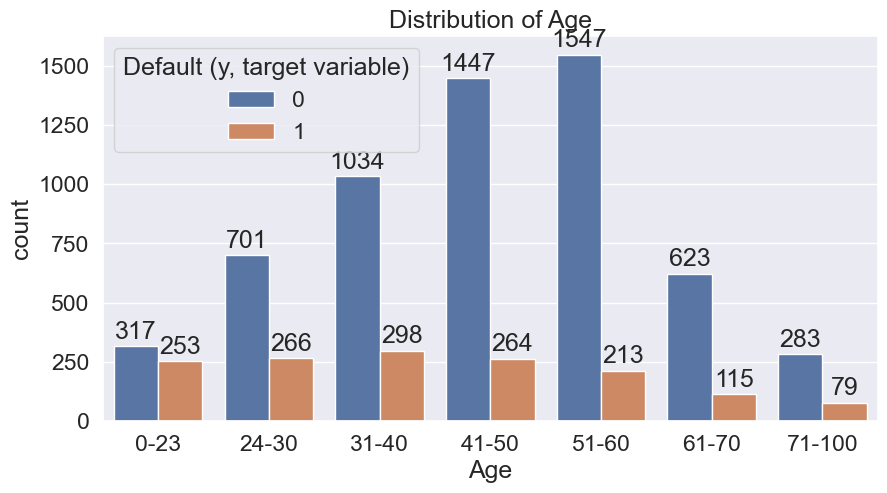

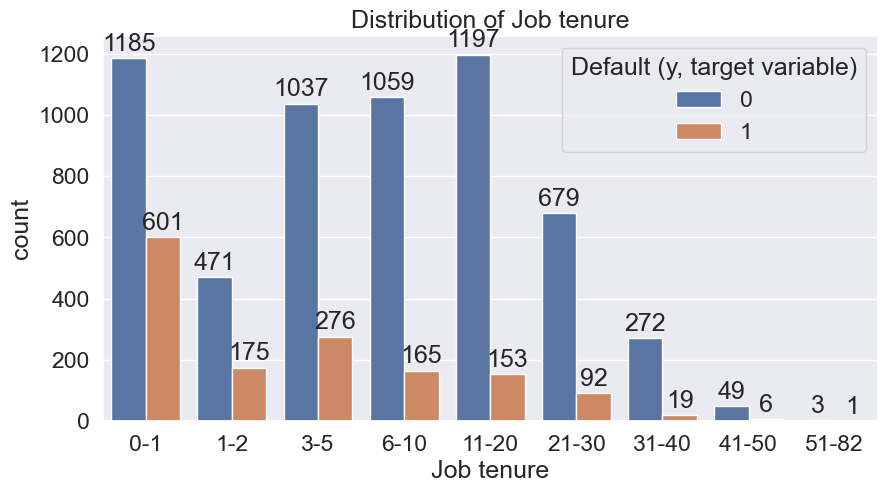

In [285]:
from matplotlib.pyplot import scatter


# distribution de la variable cible en fonction de l'age  
plt.figure(figsize=(10,5))
plot = sns.countplot(x='Age', hue='Default (y, target variable)', data=df)
plt.title('Distribution of Age')

# Ajouter le nombre de comptes à chaque barre
for p in plot.patches:
    plot.annotate(format(p.get_height(), '.0f'), 
                  (p.get_x() + p.get_width() / 2., p.get_height()), 
                  ha = 'center', 
                  va = 'center', 
                  xytext = (0, 10), 
                  textcoords = 'offset points')

plt.show()

# distribution de la variable cible en fonction de l'ancienneté
plt.figure(figsize=(10,5))
plot = sns.countplot(x='Job tenure', hue='Default (y, target variable)', data=df)
plt.title('Distribution of Job tenure')

# Ajouter le nombre de comptes à chaque barre
for p in plot.patches:
    plot.annotate(format(p.get_height(), '.0f'), 
                  (p.get_x() + p.get_width() / 2., p.get_height()), 
                  ha = 'center', 
                  va = 'center', 
                  xytext = (0, 10), 
                  textcoords = 'offset points')

plt.show()



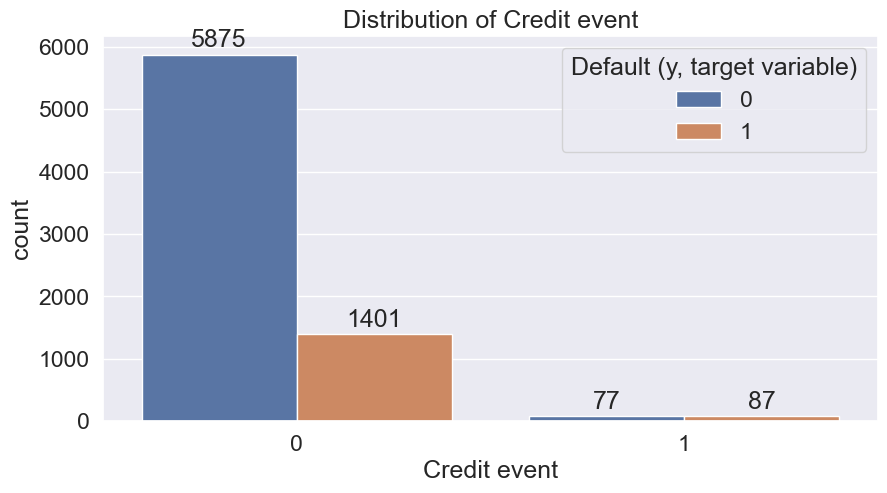

In [286]:
# plot de la variable cible en fonction de credit event
plt.figure(figsize=(10,5))
plot = sns.countplot(x='Credit event', hue='Default (y, target variable)', data=df)
plt.title('Distribution of Credit event')   

# Ajouter le nombre de comptes à chaque barre 
for p in plot.patches:
    plot.annotate(format(p.get_height(), '.0f'), 
                  (p.get_x() + p.get_width() / 2., p.get_height()), 
                  ha = 'center', 
                  va = 'center', 
                  xytext = (0, 10), 
                  textcoords = 'offset points')

    


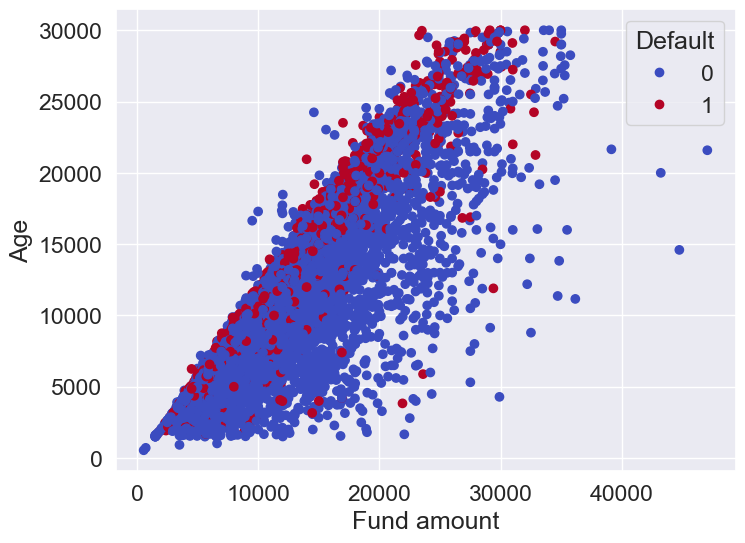

In [287]:
plt.figure(figsize=(8, 6))
scatter = plt.scatter(df["Car price"], df["Funding amount"], c=df["Default (y, target variable)"], cmap='coolwarm')
plt.xlabel('Fund amount')
plt.ylabel('Age')
# legend for y_train
plt.legend(*scatter.legend_elements(), title="Default")
plt.show()

---
#### ***Standardisation des données numériques***
---

In [288]:
from sklearn.preprocessing import StandardScaler

# standard scaler pour numeric variables uniquement sans la variable cible
scaler = StandardScaler()
df_numeric = df.select_dtypes(include=['int64', 'float64'])
df_numeric = df_numeric.drop(columns=['Default (y, target variable)'])
df_scaled = scaler.fit_transform(df_numeric)
df_scaled = pd.DataFrame(df_scaled, columns=df_numeric.columns)




---
#### ***Encodage variables catégorielles***
---

In [289]:
# One hot encoding pour les variables catégorielles
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(handle_unknown="error")
age_encod = encoder.fit_transform(df[["Age"]]).toarray()
df_age_encoded = pd.DataFrame(age_encod, columns=encoder.get_feature_names_out())
jobtenure_encod = encoder.fit_transform(df[["Job tenure"]]).toarray()
df_jobtenure_encoded = pd.DataFrame(jobtenure_encod, columns=encoder.get_feature_names_out())

df1 = pd.concat([df_scaled, df_age_encoded], axis=1)
df1 = pd.concat([df1, df_jobtenure_encoded], axis=1)
df1 = pd.concat([df1, df["Default (y, target variable)"]], axis=1)

In [290]:
df1.columns

Index(['ID', 'Car price', 'Funding amount', 'Down payment', 'Loan duration',
       'Monthly payment', 'Credit event', 'Married', 'Homeowner', 'Age_0-23',
       'Age_24-30', 'Age_31-40', 'Age_41-50', 'Age_51-60', 'Age_61-70',
       'Age_71-100', 'Job tenure_0-1', 'Job tenure_1-2', 'Job tenure_11-20',
       'Job tenure_21-30', 'Job tenure_3-5', 'Job tenure_31-40',
       'Job tenure_41-50', 'Job tenure_51-82', 'Job tenure_6-10',
       'Default (y, target variable)'],
      dtype='object')

---
## ***Train Test Split***
---

In [291]:
from sklearn.model_selection import train_test_split
X = df1.drop("Default (y, target variable)", axis=1)
X = X.drop("ID", axis=1) # colonne inutile
y = df1["Default (y, target variable)"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=1/3, random_state=42)

print(f"TRAIN SIZE: {X_train.shape[0], y_train.shape[0]} -> {X_train.shape[0] / X.shape[0] * 100:.2f}%")
print(f"VAL   SIZE: {X_val.shape[0], y_val.shape[0]} -> {X_val.shape[0] / X.shape[0] * 100:.2f}%")
print(f"TEST  SIZE: {X_test.shape[0], y_test.shape[0]} -> {X_test.shape[0] / X.shape[0] * 100:.2f}%")

TRAIN SIZE: (5208, 5208) -> 70.00%
VAL   SIZE: (1488, 1488) -> 20.00%
TEST  SIZE: (744, 744) -> 10.00%


---
## ***PCA***
---

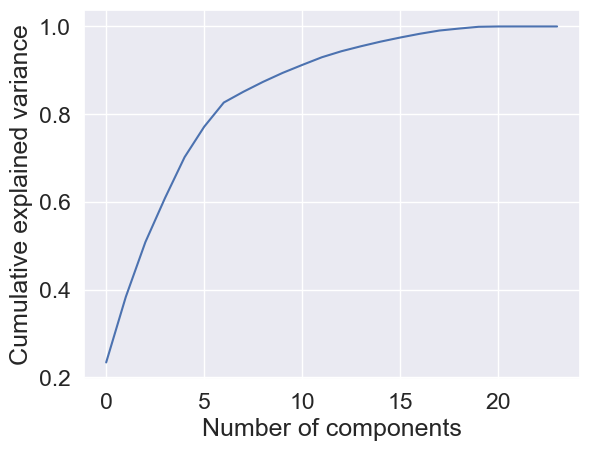

In [292]:
# proportion of variance explained en fonction du nombre de composantes
from sklearn.decomposition import PCA
pca = PCA().fit(X_train)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()


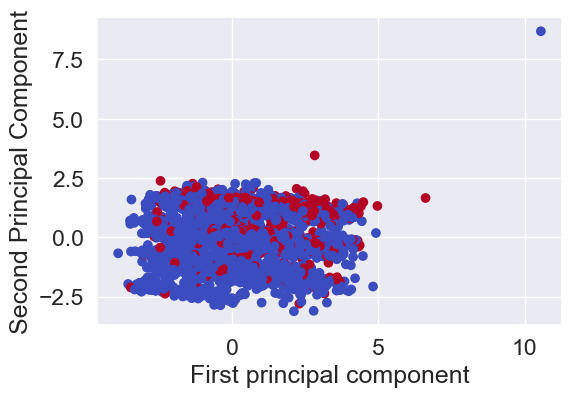

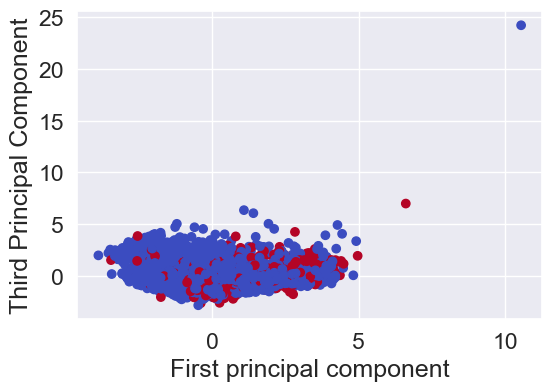

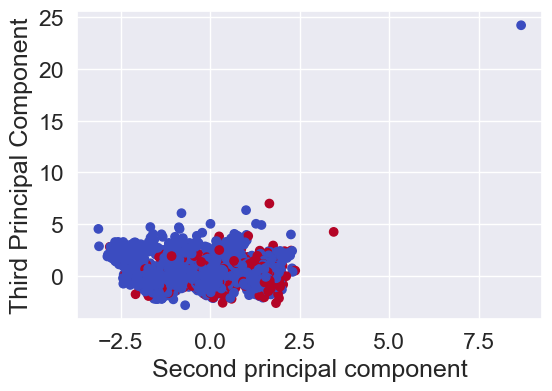

In [293]:
# pca 
from sklearn.decomposition import PCA
pca = PCA(n_components=20)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

# plot pca
plt.figure(figsize=(6, 4))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='coolwarm')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')
plt.show()

plt.figure(figsize=(6, 4))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 2], c=y_train, cmap='coolwarm')
plt.xlabel('First principal component')
plt.ylabel('Third Principal Component')
plt.show()

plt.figure(figsize=(6, 4))
plt.scatter(X_train_pca[:, 1], X_train_pca[:, 2], c=y_train, cmap='coolwarm')
plt.xlabel('Second principal component')
plt.ylabel('Third Principal Component')
plt.show()



In [294]:
# slider dans tous les axes pour voir les composantes
from ipywidgets import interact, fixed
import ipywidgets as widgets
from mpl_toolkits.mplot3d import Axes3D


def plot_3d_pca(i, j, k):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    scatter = ax.scatter(X_train_pca[:, i-1], X_train_pca[:, j-1], X_train_pca[:, k-1], c=y_train, label="Default", cmap='coolwarm')
    ax.set_xlabel(f"PCA {i}")
    ax.set_ylabel(f"PCA {j}")
    ax.set_zlabel(f"PCA {k}")
    cbar = plt.colorbar(scatter)
    cbar.set_label("Target")
    plt.title("PCA 3D Components Visualization")
    plt.show()

interact(plot_3d_pca, i=(1,3), j=(1, 3), k=(1, 3))


# fig = plt.figure(figsize=(10, 5))
# ax = fig.add_subplot(111, projection='3d')
# scatter = ax.scatter(X_train_pca[:, 2], X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, label="Default", cmap='coolwarm')
# ax.set_xlabel("PCA 1")
# ax.set_ylabel("PCA 2")
# ax.set_zlabel("PCA 3")
# cbar = plt.colorbar(scatter)
# cbar.set_label("Target")
# plt.title("PCA 3D Components Visualization")
# plt.show()

interactive(children=(IntSlider(value=2, description='i', max=3, min=1), IntSlider(value=2, description='j', m…

<function __main__.plot_3d_pca(i, j, k)>

---
## ***Modèles***
---

/Users/thomassinapi/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


                     accuracy
Logistic Regression  0.811828
Random Forest        0.802419
SVC                  0.805108
KNN                  0.775538
Decision Tree        0.680108
XGBoost              0.797043
Naive Bayes          0.731183
Dummy                0.798387


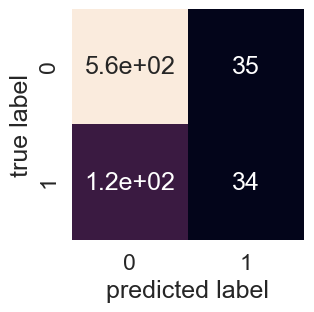

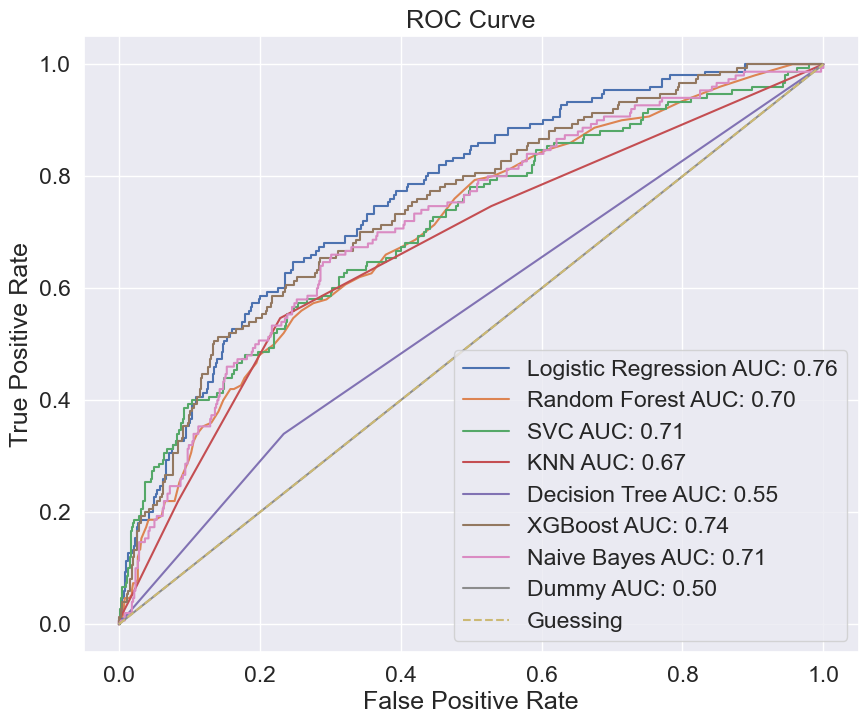

In [295]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.linear_model import Perceptron
# dummy classifier
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import balanced_accuracy_score, precision_score, recall_score, f1_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline


models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "SVC": SVC(probability=True),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "XGBoost": XGBClassifier(),
    "KNN": KNeighborsClassifier(),
    
    "Naive Bayes": GaussianNB(),
    "Dummy": DummyClassifier( strategy='most_frequent', random_state=42)   # COMPARAISON IMPORTANTE
}

def fit_and_score(models, X_train, X_test, y_train, y_test):
    np.random.seed(42)
    model_scores = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

model_scores = fit_and_score(models, X_train, X_test, y_train, y_test)

# plot un tableau avec les scores
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
print(model_compare.T)



# confusion matrix
y_preds = models['XGBoost'].predict(X_test)
confusion_matrix(y_test, y_preds)
# plot confusion matrix
sns.set(font_scale=1.5)
def plot_conf_mat(y_test, y_preds):
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True,
                     cbar=False)
    plt.ylabel("true label")
    plt.xlabel("predicted label")

plot_conf_mat(y_test, y_preds)

# roc 
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc



# plot roc curve

def plot_roc_curve(models, X_test, y_test):
    plt.figure(figsize=(10, 8))
    for name, model in models.items():
        y_proba = model.predict_proba(X_test)[:, 1]
        fpr, tpr, thresholds = roc_curve(y_test, y_proba)
        auc_score = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f"{name} AUC: {auc_score:.2f}")
    plt.plot([0, 1], [0, 1], "--", label="Guessing")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend()
    plt.show()

plot_roc_curve(models, X_test, y_test)






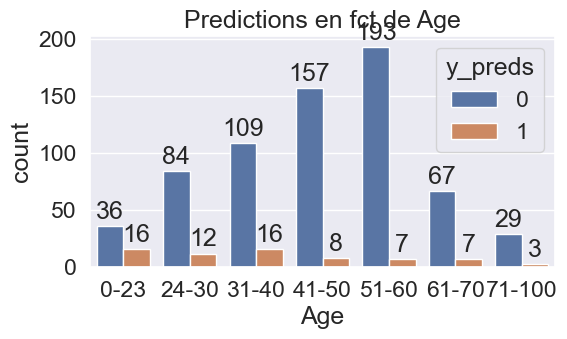

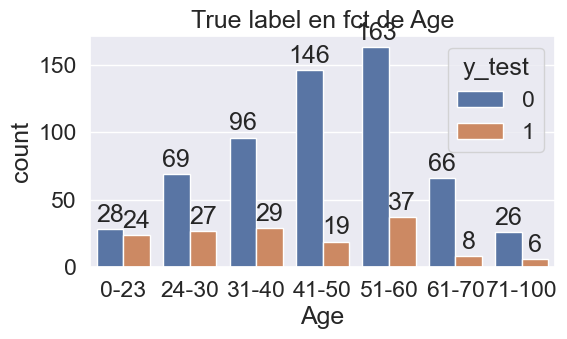

In [296]:
# afficher les predictions et la vraie valeur par age
X_test2 = X_test.copy()
X_test2["y_preds"] = y_preds
X_test2["y_test"] = y_test


X_test2["Age"] = df["Age"]
X_test2["Job tenure"] = df["Job tenure"]



# plot de la prediction et true label en fonction de l'age
plt.figure(figsize=(6,3))
plot = sns.countplot(x='Age', hue='y_preds', data=X_test2)
plt.title('Predictions en fct de Age')

# Ajouter le nombre de comptes à chaque barre
for p in plot.patches:
    plot.annotate(format(p.get_height(), '.0f'), 
                  (p.get_x() + p.get_width() / 2., p.get_height()), 
                  ha = 'center', 
                  va = 'center', 
                  xytext = (0, 10), 
                  textcoords = 'offset points')
    

# plot de la prediction et true label en fonction de l'age
plt.figure(figsize=(6,3))
plot = sns.countplot(x='Age', hue='y_test', data=X_test2)
plt.title('True label en fct de Age')

# Ajouter le nombre de comptes à chaque barre
for p in plot.patches:
    plot.annotate(format(p.get_height(), '.0f'), 
                  (p.get_x() + p.get_width() / 2., p.get_height()), 
                  ha = 'center', 
                  va = 'center', 
                  xytext = (0, 10), 
                  textcoords = 'offset points')

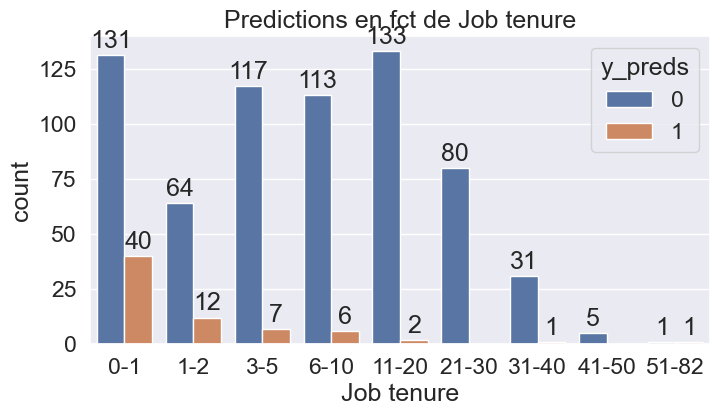

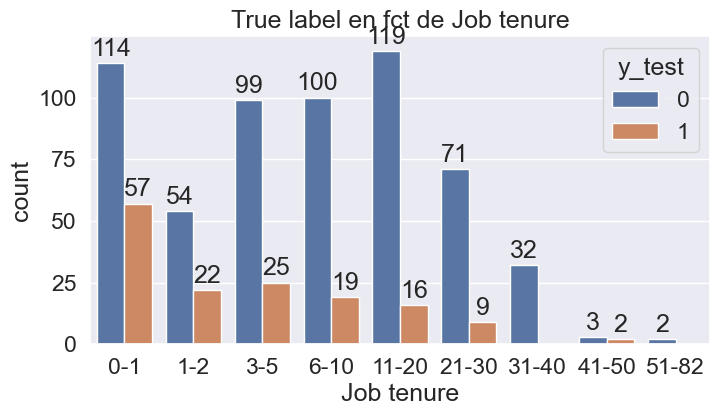

In [297]:
plt.figure(figsize=(8,4))
plot = sns.countplot(x='Job tenure', hue='y_preds', data=X_test2)
plt.title('Predictions en fct de Job tenure')

# Ajouter le nombre de comptes à chaque barre
for p in plot.patches:
    plot.annotate(format(p.get_height(), '.0f'), 
                  (p.get_x() + p.get_width() / 2., p.get_height()), 
                  ha = 'center', 
                  va = 'center', 
                  xytext = (0, 10), 
                  textcoords = 'offset points')
    

# plot de la prediction et true label en fonction de l'age
plt.figure(figsize=(8,4))
plot = sns.countplot(x='Job tenure', hue='y_test', data=X_test2)
plt.title('True label en fct de Job tenure')

# Ajouter le nombre de comptes à chaque barre
for p in plot.patches:
    plot.annotate(format(p.get_height(), '.0f'), 
                  (p.get_x() + p.get_width() / 2., p.get_height()), 
                  ha = 'center', 
                  va = 'center', 
                  xytext = (0, 10), 
                  textcoords = 'offset points')

In [298]:
# balanced accuracy score
print(f"Balanced accuracy score: {balanced_accuracy_score(y_test, y_preds):.2f}%")


# on choisit la balanced accuracy score car les classes sont desequilibrées

Balanced accuracy score: 0.58%


### ***Evaluate Classifier***

In [299]:
from sklearn.model_selection import cross_val_score

def evaluate_classifier(clf):
    name = getattr(clf, 'name', clf.__class__.__name__)
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    y_pred = clf.predict(X_test)
    balanced_score = balanced_accuracy_score(y_test, y_pred)
    
    # Effectuer une validation croisée
    cv_scores = cross_val_score(clf, X_train, y_train, cv=5)
    mean_cv_score = np.mean(cv_scores)
    
    display(HTML(
        f"<h2>{name}</h2>"
        f"Test Accuracy: <b>{score:7.2%}</b> <br/>"
        f"<br/>"
        f"<span style='color:green;'><b>Balanced accuracy: {balanced_score:7.2%}</b></span> <br/>" 
        f"<br/>"
        f"Cross-validation score: <b>{mean_cv_score:7.2%}</b> <br/>"
        f"<br/>"
        f"AUC: <b>{roc_auc_score(y_test, y_pred):7.2%}</b> <br/>"
        f"<br/>"
        f"R2: <b>{clf.score(X_test, y_test):7.2%}</b> <br/>"
    ))
    
def pca_evaluate_classifier(clf):
    name = getattr(clf, 'name', clf.__class__.__name__)
    clf.fit(X_train_pca, y_train)
    score = clf.score(X_test_pca, y_test)
    y_pred = clf.predict(X_test_pca)
    balanced_score = balanced_accuracy_score(y_test, y_pred)
    display(HTML(
        f"<h2>{name}</h2>"
        f"Test Accuracy: <b>{score:7.2%}</b> <br/>"
        f"Balanced accuracy: <b>{balanced_score:7.2%}</b> <br/>"
    ))


---
## ***Grid Search***
---

In [300]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.model_selection import RandomizedSearchCV
# from sklearn.model_selection import cross_val_score

# from xgboost import XGBClassifier
# # logistic regression
# from sklearn.linear_model import LogisticRegression

# param_grid = {
#     "solver": ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
#     "penalty": ['l1', 'l2', 'elasticnet']
# }

# log_reg_grid = GridSearchCV(LogisticRegression(), param_grid=param_grid, cv=5, verbose=False, n_jobs=-1)
# log_reg_grid.fit(X_train, y_train)
# # best params
# log_reg_grid.best_params_



---
## ***Tests différentes méthodes de preprocessing et modèles***
---

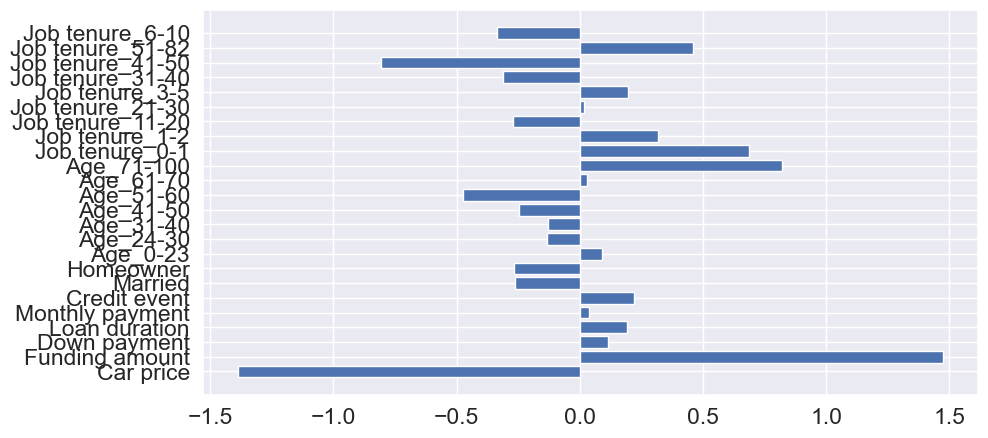

In [301]:
# coefficients de la regression logistique 
models["Logistic Regression"].coef_
plt.figure(figsize=(10, 5))
plt.barh(X_train.columns, models["Logistic Regression"].coef_[0])
plt.yticks(rotation=0)
plt.show()

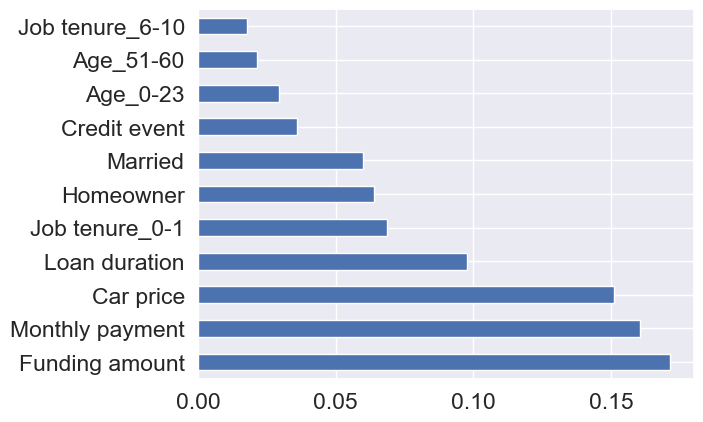

In [309]:
model_rf = RandomForestClassifier(n_estimators=200,
                                 max_depth=10,
                                 min_samples_split=4,
                                 min_samples_leaf=1)
evaluate_classifier(model_rf)


# plot feature importance
feat_importances = pd.Series(model_rf.feature_importances_, index=X.columns)
feat_importances.nlargest(11).plot(kind='barh')
plt.show()



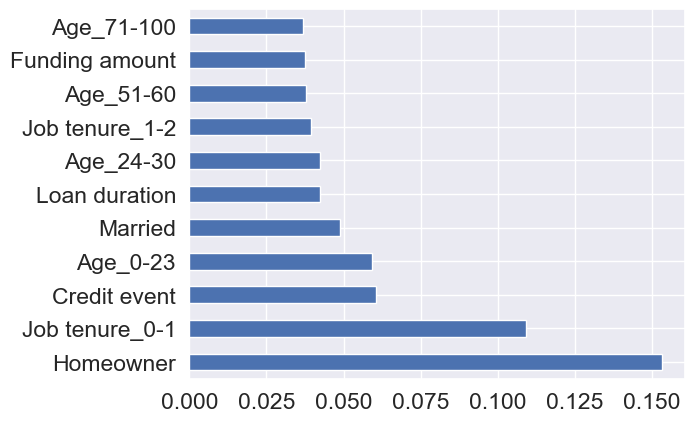

In [311]:
model_xg = XGBClassifier(n_estimators=300,
                                 max_depth=10,
                                 learning_rate=0.05)
evaluate_classifier(model_xg)
feat_importances = pd.Series(model_xg.feature_importances_, index=X.columns)
feat_importances.nlargest(11).plot(kind='barh')
plt.show()


In [304]:
# dummy classifier
model = DummyClassifier(strategy='most_frequent', random_state=42)
evaluate_classifier(model)

# plot feature import

In [305]:
# SVM 
from sklearn.svm import SVC
model_svm = SVC(kernel='linear', C=1, gamma=1)
evaluate_classifier(model_svm)

# confunsion matrix
y_preds = model_svm.predict(X_test)
confusion_matrix(y_test, y_preds)


array([[582,  12],
       [143,   7]])

In [312]:
from sklearn.base import clone
model_lr_balanced = clone(model_xg)
ratio = float(np.sum(y_train == 0)) / np.sum(y_train==1)
model_lr_balanced.set_params(scale_pos_weight = ratio)
model_lr_balanced.name = "XGBoost with balanced weights"
evaluate_classifier(model_lr_balanced)


In [314]:
model_rf = RandomForestClassifier(n_estimators=200,
                                 max_depth=10,
                                 min_samples_split=4,
                                 min_samples_leaf=1)
model_rf_balanced = clone(model_rf)
model_rf_balanced.set_params(class_weight='balanced_subsample')
model_rf_balanced.name = "Balanced Subsample Random Forest"

evaluate_classifier(model_rf_balanced)

In [315]:
from imblearn.pipeline import make_pipeline as make_pipeline_imblearn
from imblearn.under_sampling import RandomUnderSampler

model_lr_undersampled = make_pipeline_imblearn(
    RandomUnderSampler(),
    XGBClassifier(n_estimators=300,
                                    max_depth=10,
                                    learning_rate=0.05)

)
model_lr_undersampled.name = "XGBClassifier from rebalanced undersampled data"

evaluate_classifier(model_lr_undersampled)

In [316]:
from imblearn.over_sampling import RandomOverSampler

model_lr_oversampled = make_pipeline_imblearn(
    RandomOverSampler(),
    XGBClassifier(n_estimators=300,
                                max_depth=10,
                                learning_rate=0.05)
)
model_lr_oversampled.name = "XGBClassifier from rebalanced oversampled data"

evaluate_classifier(model_lr_oversampled)

In [317]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

model_lr_smote = make_pipeline_imblearn(
    SMOTE(),
    XGBClassifier(n_estimators=300,
                                max_depth=10,
                                learning_rate=0.05)
)
model_lr_smote.name = "XGBClassifier from SMOTE sampled data"

evaluate_classifier(model_lr_smote)

In [318]:
from imblearn.ensemble import BalancedRandomForestClassifier

model_balanced_rf = make_pipeline(
    BalancedRandomForestClassifier(
        n_estimators=100, random_state=42
    )
)
model_balanced_rf.name = "Balanced Random Forest"

evaluate_classifier(model_balanced_rf)

/Users/thomassinapi/opt/anaconda3/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/thomassinapi/opt/anaconda3/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
/Users/thomassinapi/opt/anaconda3/lib/python3.8/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence 

In [319]:
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier

In [320]:
model_hgb = make_pipeline(
    HistGradientBoostingClassifier(random_state=42)
)
model_hgb.name = "Histogram-based Gradient Boosting"
evaluate_classifier(model_hgb)

In [321]:
model_bagging = make_pipeline(
    BaggingClassifier(
        base_estimator=HistGradientBoostingClassifier(),
        n_estimators=10, random_state=42
    )
)
model_bagging.name = "Bagging Model"

evaluate_classifier(model_bagging)

/Users/thomassinapi/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/thomassinapi/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/thomassinapi/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/thomassinapi/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/thomassinapi/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` 

In [322]:
x_train = X_train.to_numpy()
x_test = X_test.to_numpy()
Y_train = y_train.to_numpy()
Y_test = y_test.to_numpy()

---
## ***Neural Network***
---

In [323]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import numpy as np


# Normalisez les données
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convertissez les données en tensors PyTorch
X_train_tensor = torch.Tensor(X_train)
y_train_tensor = torch.Tensor(y_train.values)
X_test_tensor = torch.Tensor(X_test)
y_test_tensor = torch.Tensor(y_test)

# Créez des datasets PyTorch
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

# Paramètres du modèle
input_size = X_train.shape[1]
hidden_size = 64
output_size = 1

# Définissez l'architecture du modèle
class ShallowNeuralNetwork(nn.Module):
    def __init__(self):
        super(ShallowNeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.sigmoid(x)
        return x

# Créez une instance du modèle
model = ShallowNeuralNetwork()

# Définissez la fonction de perte et l'optimiseur
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Paramètres d'entraînement
epochs = 10
batch_size = 32

# Créez des dataloaders
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Entraînement du modèle
for epoch in range(epochs):
    model.train()
    for batch_X, batch_y in train_loader:
        optimizer.zero_grad()
        output = model(batch_X)
        loss = criterion(output, batch_y.view(-1, 1))
        loss.backward()
        optimizer.step()

# Évaluation du modèle
model.eval()
predictions = []
true_labels = []

with torch.no_grad():
    for batch_X, batch_y in test_loader:
        output = model(batch_X)
        predictions.extend(output.numpy())
        true_labels.extend(batch_y.numpy())

# Convertissez les prédictions en classes (0 ou 1)
predictions = np.round(predictions).astype(int)

# Évaluation des performances
accuracy = accuracy_score(true_labels, predictions)
print(f"Accuracy: {accuracy}")


Accuracy: 0.8064516129032258


In [324]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import numpy as np

# Supposons que X contient vos caractéristiques et y la variable cible
# Assurez-vous d'adapter ces étapes à votre propre base de données

# Divisez les données en ensembles d'entraînement et de test


# Normalisez les données
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convertissez les données en tensors PyTorch
X_train_tensor = torch.Tensor(X_train)
y_train_tensor = torch.Tensor(y_train.values)
X_test_tensor = torch.Tensor(X_test)
y_test_tensor = torch.Tensor(y_test)

# Créez des datasets PyTorch
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

# Paramètres du modèle
input_size = X_train.shape[1]
hidden_size1 = 64
hidden_size2 = 32
hidden_size3 = 16
output_size = 1

# Définissez l'architecture du modèle
class DeepNeuralNetwork(nn.Module):
    def __init__(self):
        super(DeepNeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(hidden_size2, hidden_size3)
        self.relu3 = nn.ReLU()
        self.fc4 = nn.Linear(hidden_size3, output_size)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.fc3(x)
        x = self.relu3(x)
        x = self.fc4(x)
        x = self.sigmoid(x)
        return x

# Créez une instance du modèle
model = DeepNeuralNetwork()

# Définissez la fonction de perte et l'optimiseur
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Paramètres d'entraînement
epochs = 10
batch_size = 32

# Créez des dataloaders
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Entraînement du modèle
for epoch in range(epochs):
    model.train()
    for batch_X, batch_y in train_loader:
        optimizer.zero_grad()
        output = model(batch_X)
        loss = criterion(output, batch_y.view(-1, 1))
        loss.backward()
        optimizer.step()

# Évaluation du modèle
model.eval()
predictions = []
true_labels = []

with torch.no_grad():
    for batch_X, batch_y in test_loader:
        output = model(batch_X)
        predictions.extend(output.numpy())
        true_labels.extend(batch_y.numpy())

# Convertissez les prédictions en classes (0 ou 1)
predictions = np.round(predictions).astype(int)

# Évaluation des performances
accuracy = accuracy_score(true_labels, predictions)
print(f"Accuracy: {accuracy}")


Accuracy: 0.7956989247311828


In [325]:
dum = DummyClassifier(strategy='most_frequent', random_state=42)
dum.fit(X_train, y_train)
y_pred = dum.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

# confusion matrix
y_preds = dum.predict(X_test)
confusion_matrix(y_test, y_preds)



Accuracy: 0.7983870967741935


array([[594,   0],
       [150,   0]])

#### ***Comparaison des résultats obtenus des différents modèles peu sattisfaisants par rapport au Dummy Classifier***

## Validation ... 